<a href="https://colab.research.google.com/github/ChoeTaeBin/Machine-Learnig/blob/main/Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

합성곱 신경망을 이용해서 사진 데이터를 분류할 수 있다.

In [2]:
#데이터 준비
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
#유사 정규화
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

#검증 세트 나누기
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

4422102/4422102 [==============================] - 1s 0us/step


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_7 (Dense)             (None, 100)              

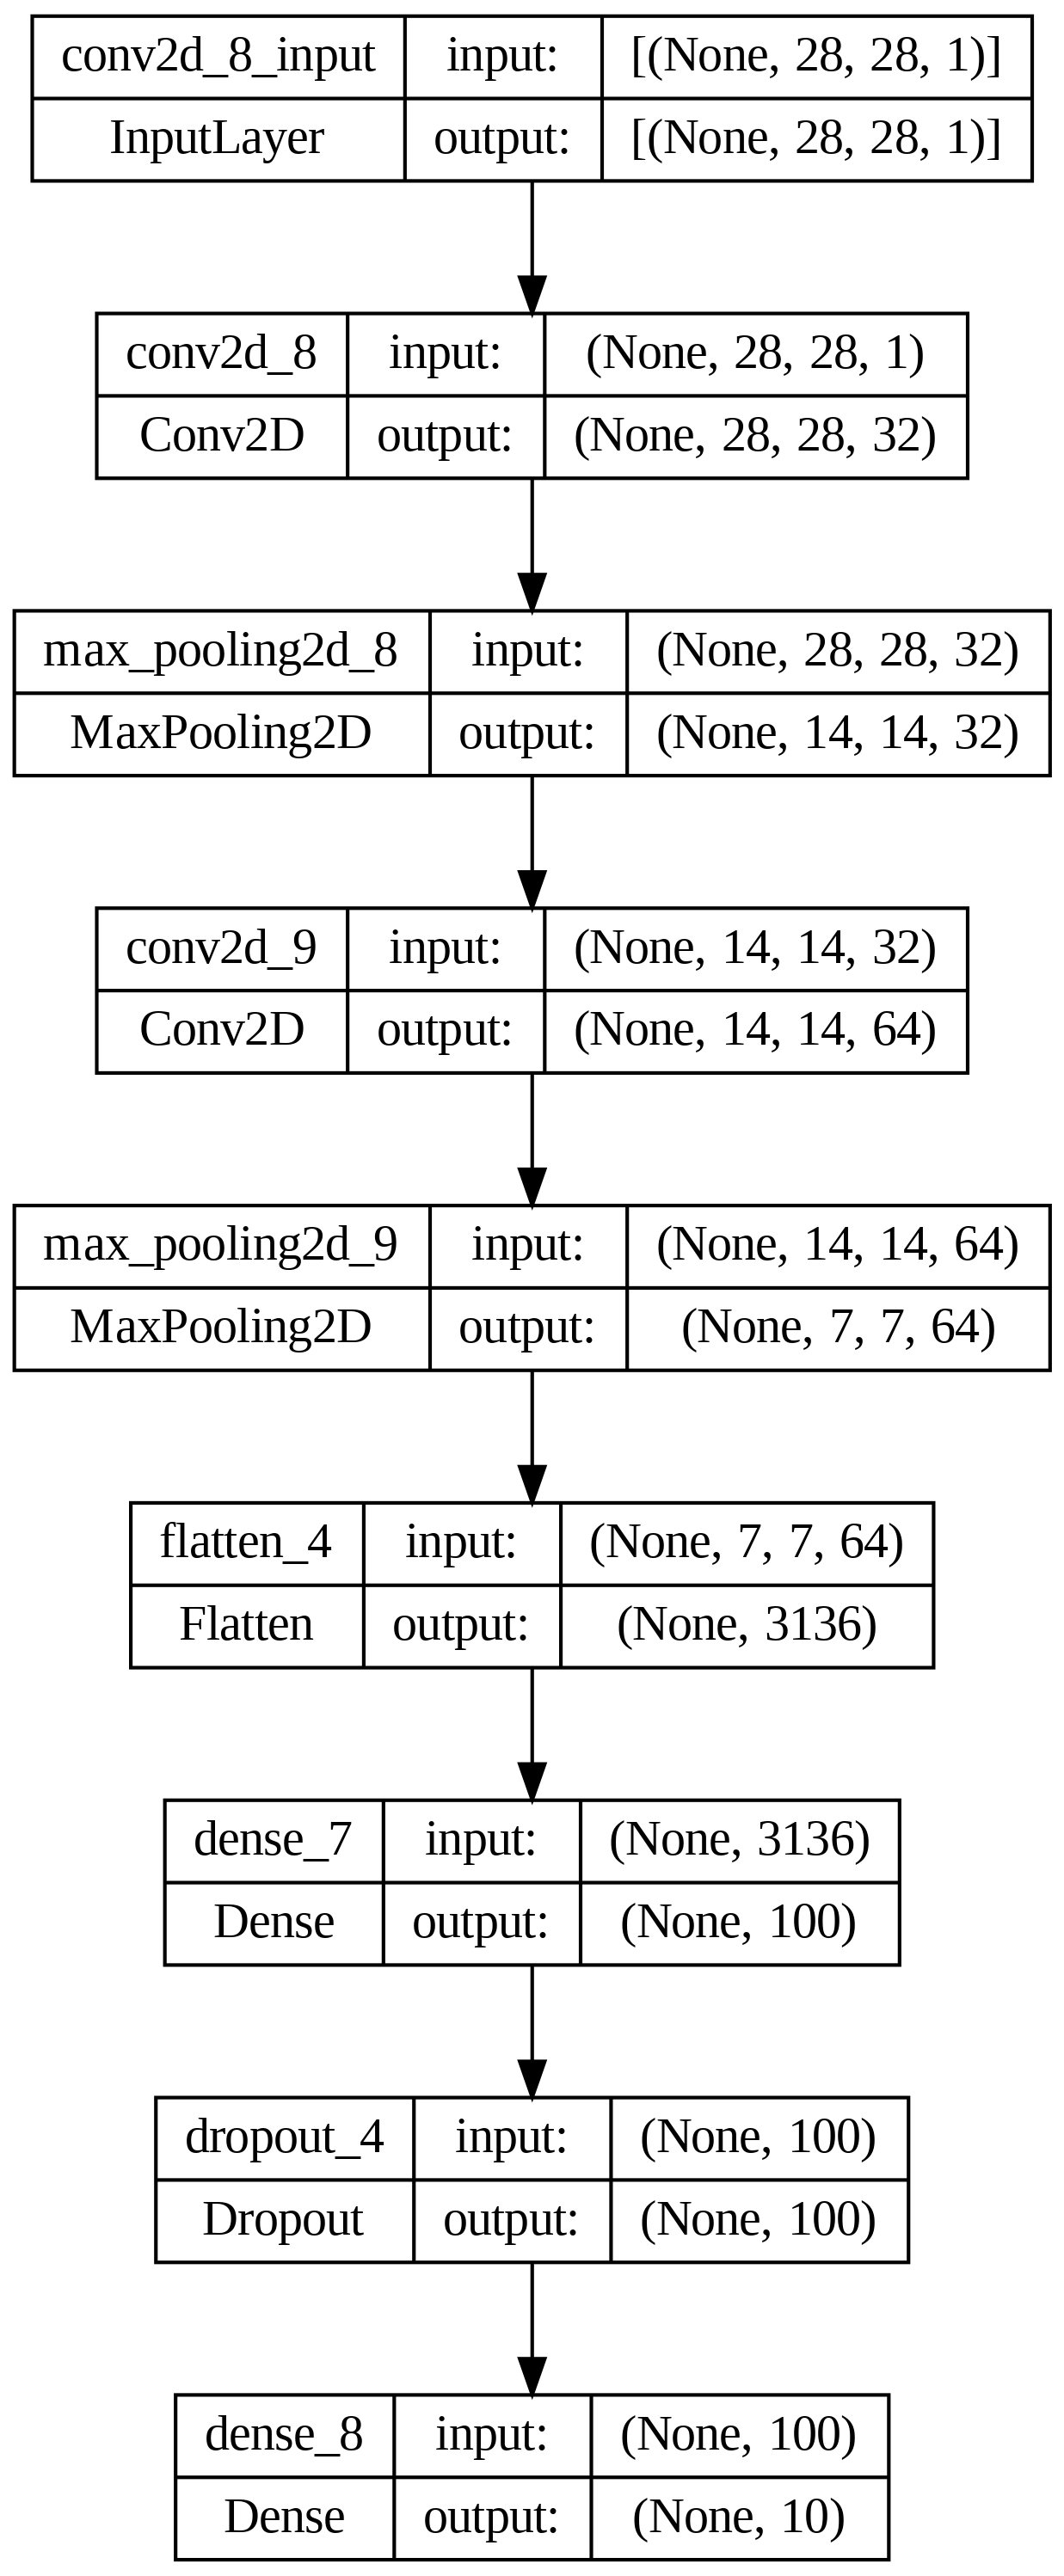

In [8]:
#모델 만들기

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1))) #합성곱 층
model.add(keras.layers.MaxPooling2D(2))#풀링 층
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same')) #합성곱 층
model.add(keras.layers.MaxPooling2D(2))#풀링 층

model.add(keras.layers.Flatten()) #flatten 층
model.add(keras.layers.Dense(100, activation='relu')) #밀집층
model.add(keras.layers.Dropout(0.4)) #drop out
model.add(keras.layers.Dense(10, activation = 'softmax')) #출력층

model.summary()

keras.utils.plot_model(model, show_shapes=True, to_file = 'cnn-architecture.png', dpi = 300)

In [9]:
#모델 설정
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

#모델 훈련
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 12s 5ms/step - loss: 0.5082 - accuracy: 0.8190 - val_loss: 0.3167 - val_accuracy: 0.8848
Epoch 2/20
  29/1500 [..............................] - ETA: 5s - loss: 0.3143 - accuracy: 0.8815

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 7s 5ms/step - loss: 0.3395 - accuracy: 0.8772 - val_loss: 0.2730 - val_accuracy: 0.8972
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2914 - accuracy: 0.8946 - val_loss: 0.2574 - val_accuracy: 0.9057
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2592 - accuracy: 0.9045 - val_loss: 0.2410 - val_accuracy: 0.9108
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2374 - accuracy: 0.9126 - val_loss: 0.2293 - val_accuracy: 0.9140
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2121 - accuracy: 0.9229 - val_loss: 0.2168 - val_accuracy: 0.9189
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1966 - accuracy: 0.9266 - val_loss: 0.2120 - val_accuracy: 0.9216
Epoch 8/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1809 - accuracy: 0.9334 - val_loss: 0.2142 - val_accuracy: 0.9222
Epo

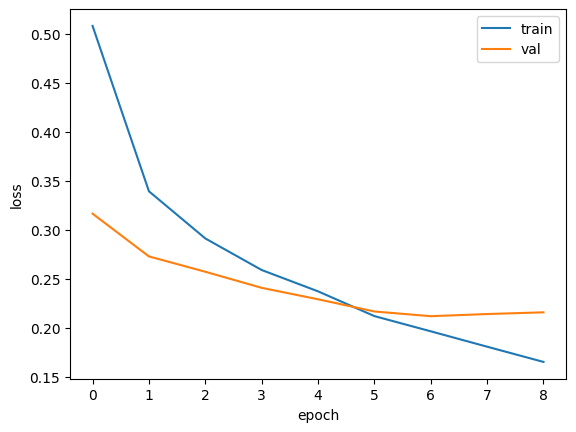

In [10]:
#그래프 그리기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

In [18]:
import numpy as np
#실제로 예측해보자

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '엥클부츠']
print('예측: ', classes[np.argmax(model.predict(test_input[0:1]))], '정답: ', classes[test_target[0]])


1/1 [==============================] - 0s 91ms/step
예측:  엥클부츠 정답:  엥클부츠


In [19]:
#모델 평가

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2357 - accuracy: 0.9168


[0.23567470908164978, 0.9168000221252441]